# **OBJETIVO**

##Explorar:
por meio das técnicas de gestão de projetos e
análise exploratória algumas das
possíveis relações e insights que se podem obter a partir da base de dados. Use
o poder de síntese do grupo para encontrar e apresentar apenas os insights que
na visão do grupo realmente possam ajudar a empresa a atingir seus objetivos
com essa análise (lembrando que o principal objetivo é ter um ambiente em que
os funcionários não se sintam desgastados com a XPTO)

##REQUISITOS OBRIGATÓRIOS:

Medidas de estatística descritiva (tendência central,
dispersão, separatrizes e associação) de pelo menos 4 atributos que possam
ajudar com insights relevantes para a empresa.

Pelo menos três distribuições de frequência para atributos
diferentes, sendo obrigatoriamente atributos quantitativos e qualitativos,
lembrando que para atributos quantitativos as distribuições de frequência dever ser agrupadas por faixas de valores.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sns

#**DESCONSIDERAR OS DADOS BRUTOS, UMA VEZ QUE, JÁ FORAM TRATADOS ANTERIORMENTE**

In [ ]:
url = '/content/desgaste_funcionarios_bruto.csv'

In [ ]:
df = pd.read_csv(url)
df

,Idade,Demissão,Viagem de negócios,Diárias recebidas,Departamento,Distância de Casa,Escolaridade,Área de Formação,Número de contratos de trabalho na empresa,ID Funcionário,...,Satisfação nas relações no trabalho,Jornada padrão de trabalho,opção de remuneração variável em ações,Total de anos trabalhados,Qtde de treinamentos realizados no último ano,Equilíbrio vida trabalho,Total de anos trabalhados na empresa,Anos trabalhados na função atual,Anos desde a última promoção,Anos trabalhando com o atual gestor
0,41,Sim,Viaja raramente,1102,Vendas,1,2,Ciências Humanas,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,Não,Viaja frequentemente,279,Pesquisa e Desenvolvimento,8,1,Ciências Humanas,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Sim,Viaja raramente,1373,Pesquisa e Desenvolvimento,2,2,Outras,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Não,Viaja frequentemente,1392,Pesquisa e Desenvolvimento,3,4,Ciências Humanas,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,Não,Viaja raramente,591,Pesquisa e Desenvolvimento,2,1,Ciências Médicas,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,Viaja frequentemente,884,Pesquisa e Desenvolvimento,23,2,Ciências Médicas,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,Não,Viaja raramente,613,Pesquisa e Desenvolvimento,6,1,Ciências Médicas,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,Não,Viaja raramente,155,Pesquisa e Desenvolvimento,4,3,Ciências Humanas,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,Não,Viaja frequentemente,1023,Vendas,2,3,Ciências Médicas,1,2065,...,4,80,0,17,3,2,9,6,0,8


##**ANÁLISE EXPLORATÓRIA**

Análise exploratória deve conter:

- medidas descritivas(quantitativas e qualitativas)

**Quantitativas**
- Formas de agregação

- Medidas de tendencia central(media, mediana e moda) - concentração

- medidas de dispersão(variancia e desvio padrão) - espalhamento

- medidas de posição e separatrizes (quartiz, percentis e outliers)

**Qualitativas**
- Frequencia
- Frequencia relativa


**COEFICIENTE DE CORRELAÇÃO(r)**
- Quanto de explicação tem a relação entre eixo X e Y

**COEFICIENTE DE DETERMINAÇÃO(r²)**


##**Verificação dos nomes das colunas**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Idade                                           1470 non-null   int64 
 1   Demissão                                        1470 non-null   object
 2   Viagem de negócios                              1470 non-null   object
 3   Diárias recebidas                               1470 non-null   int64 
 4   Departamento                                    1470 non-null   object
 5   Distância de Casa                               1470 non-null   int64 
 6   Escolaridade                                    1470 non-null   int64 
 7   Área de Formação                                1470 non-null   object
 8   Número de contratos de trabalho na empresa      1470 non-null   int64 
 9   ID Funcionário                                  1470

##**Tratamento de Dados**

In [ ]:
# Renomenado as colunas para facilitar
df.rename(columns={
    'Idade':'idade','Demissão':'demissao','Viagem de negócios':'viajar','Diárias recebidas':'diarias','Departamento':'departamento',
    'Distância de Casa':'distancia','Escolaridade':'escolaridade','Área de Formação':'formação',
    'Número de contratos de trabalho na empresa':'contratos','ID Funcionário':'id','Nível de Satisfação com o ambiente de trabalho':'satisfação ambiente trabalho',
    'Gênero':'genero','Salário por hora':'salario hora','Nível de envolvimento com o trabalho':'envolvimento trabalho',
    'Nível hierárquico':'nivel hierarquico','Cargo':'cargo','Satisfação com o trabalho':'satisfação trabalho','Estado civil':'estado civil',
    'Renda mensal':'renda','Salário Mensal':'salario','qtde de empresas que já trabalhou':'empresas trabalhadas','Maior de idade':'maioridade',
    'Faz hora extra':'hora extra','percentual de aumento de salário':'aumento de salario','score de performance':'performance',
    'Satisfação nas relações no trabalho':'satisfação relações trabalho','Jornada padrão de trabalho':'jornada',
    'opção de remuneração variável em ações':'stocks','Total de anos trabalhados':'anos trabalhados',
    'Qtde de treinamentos realizados no último ano':'treinamentos feitos','Equilíbrio vida trabalho':'qualidade de vida',
    'Total de anos trabalhados na empresa':'tempo de casa','Anos trabalhados na função atual':'anos função atual',
    'Anos desde a última promoção':'ultima promoção','Anos trabalhando com o atual gestor':'tempo com atual gestor'}, inplace=True)
df

,idade,demissao,viajar,diarias,departamento,distancia,escolaridade,formação,contratos,id,...,satisfação relações trabalho,jornada,stocks,anos trabalhados,treinamentos feitos,qualidade de vida,tempo de casa,anos função atual,ultima promoção,tempo com atual gestor
0,41,Sim,Viaja raramente,1102,Vendas,1,2,Ciências Humanas,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,Não,Viaja frequentemente,279,Pesquisa e Desenvolvimento,8,1,Ciências Humanas,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Sim,Viaja raramente,1373,Pesquisa e Desenvolvimento,2,2,Outras,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Não,Viaja frequentemente,1392,Pesquisa e Desenvolvimento,3,4,Ciências Humanas,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,Não,Viaja raramente,591,Pesquisa e Desenvolvimento,2,1,Ciências Médicas,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,Viaja frequentemente,884,Pesquisa e Desenvolvimento,23,2,Ciências Médicas,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,Não,Viaja raramente,613,Pesquisa e Desenvolvimento,6,1,Ciências Médicas,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,Não,Viaja raramente,155,Pesquisa e Desenvolvimento,4,3,Ciências Humanas,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,Não,Viaja frequentemente,1023,Vendas,2,3,Ciências Médicas,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   idade                         1470 non-null   int64 
 1   demissao                      1470 non-null   object
 2   viajar                        1470 non-null   object
 3   diarias                       1470 non-null   int64 
 4   departamento                  1470 non-null   object
 5   distancia                     1470 non-null   int64 
 6   escolaridade                  1470 non-null   int64 
 7   formação                      1470 non-null   object
 8   contratos                     1470 non-null   int64 
 9   id                            1470 non-null   int64 
 10  satisfação ambiente trabalho  1470 non-null   int64 
 11  genero                        1470 non-null   object
 12  salario hora                  1470 non-null   int64 
 13  envolvimento traba

In [ ]:
# Atualizando informações numéricas de escolaridade
df['escolaridade']=df['escolaridade'].map({1:'Abaixo da faculdade', 2:'Faculdade',3:'Bacharelado', 4:'Mestre', 5:'Doutor'})

In [ ]:
# Atualizando informações numéricas de satisfação ambiente trabalho
df['satisfação ambiente trabalho']=df['satisfação ambiente trabalho'].map({1:'Baixo',2:'Médio',3:'Alto',4:'Muito Alto'})

In [ ]:
# Atualizando informações numéricas de envolvimento trabalho
df['envolvimento trabalho']=df['envolvimento trabalho'].map({1:'Baixo',2:'Médio',3:'Alto',4:'Muito Alto'})

In [ ]:
# Atualizando informações numéricas de nivel hierarquico
df['nivel hierarquico']=df['nivel hierarquico'].map({1:'Muito Baixo',2:'Baixo',3:'Médio',4:'Alto',5:'Muito Alto'})

In [ ]:
# Atualizando informações numéricas de satisfação trabalho
df['satisfação trabalho']=df['satisfação trabalho'].map({1:'Baixo',2:'Médio',3:'Alto',4:'Muito Alto'})

In [ ]:
# Atualizando informações numéricas de satisfação relações trabalho
df['satisfação relações trabalho']=df['satisfação relações trabalho'].map({1:'Baixo',2:'Médio',3:'Alto',4:'Muito Alto'})

In [ ]:
# Atualizando informações numéricas de stocks
df['stocks']=df['stocks'].map({0:'Zero',1:'Baixo',2:'Médio',3:'Alto'})

In [ ]:
# Atualizando informações numéricas de qualidade de vida
df['qualidade de vida']=df['qualidade de vida'].map({1:'Ruim',2:'Bom',3:'Muito Bom',4:'Ótimo'})

In [ ]:
df.head(1)

,idade,demissao,viajar,diarias,departamento,distancia,escolaridade,formação,contratos,id,...,satisfação relações trabalho,jornada,stocks,anos trabalhados,treinamentos feitos,qualidade de vida,tempo de casa,anos função atual,ultima promoção,tempo com atual gestor
0,41,Sim,Viaja raramente,1102,Vendas,1,Faculdade,Ciências Humanas,1,1,...,Baixo,80,Zero,8,0,Ruim,6,4,0,5


#**CONSIDERAR A PARTIR DOS DADOS TRATADOS**

In [ ]:
# Dados tratados
df.to_csv('desgastes_funcionarios_tratados.csv',index=False)

In [ ]:
url2=('/content/desgastes_funcionarios_tratados.csv')
rh = pd.read_csv(url2)

In [ ]:
display(rh)

,idade,demissao,viajar,diarias,departamento,distancia,escolaridade,formação,contratos,id,...,satisfação relações trabalho,jornada,stocks,anos trabalhados,treinamentos feitos,qualidade de vida,tempo de casa,anos função atual,ultima promoção,tempo com atual gestor
0,41,Sim,Viaja raramente,1102,Vendas,1,Faculdade,Ciências Humanas,1,1,...,Baixo,80,Zero,8,0,Ruim,6,4,0,5
1,49,Não,Viaja frequentemente,279,Pesquisa e Desenvolvimento,8,Abaixo da faculdade,Ciências Humanas,1,2,...,Muito Alto,80,Baixo,10,3,Muito Bom,10,7,1,7
2,37,Sim,Viaja raramente,1373,Pesquisa e Desenvolvimento,2,Faculdade,Outras,1,4,...,Médio,80,Zero,7,3,Muito Bom,0,0,0,0
3,33,Não,Viaja frequentemente,1392,Pesquisa e Desenvolvimento,3,Mestre,Ciências Humanas,1,5,...,Alto,80,Zero,8,3,Muito Bom,8,7,3,0
4,27,Não,Viaja raramente,591,Pesquisa e Desenvolvimento,2,Abaixo da faculdade,Ciências Médicas,1,7,...,Muito Alto,80,Baixo,6,3,Muito Bom,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,Viaja frequentemente,884,Pesquisa e Desenvolvimento,23,Faculdade,Ciências Médicas,1,2061,...,Alto,80,Baixo,17,3,Muito Bom,5,2,0,3
1466,39,Não,Viaja raramente,613,Pesquisa e Desenvolvimento,6,Abaixo da faculdade,Ciências Médicas,1,2062,...,Baixo,80,Baixo,9,5,Muito Bom,7,7,1,7
1467,27,Não,Viaja raramente,155,Pesquisa e Desenvolvimento,4,Bacharelado,Ciências Humanas,1,2064,...,Médio,80,Baixo,6,0,Muito Bom,6,2,0,3
1468,49,Não,Viaja frequentemente,1023,Vendas,2,Bacharelado,Ciências Médicas,1,2065,...,Muito Alto,80,Zero,17,3,Bom,9,6,0,8


## **AGRUPAMENTOS**

In [ ]:
# Agrupado por Demissao, agregado por média e mostrado as demissões + salario mensal
rh[['demissao','salario','genero']].groupby(['demissao','genero']).mean()

salario
demissao genero                 
Não      Feminino   14621.592814
         Masculino  14022.251366
Sim      Feminino   14979.850575
         Masculino  14315.393333

In [ ]:
# Média de Salário por Departamento
rh[['demissao','departamento','salario']].groupby(['departamento','demissao']).mean()

salario
departamento               demissao              
Pesquisa e Desenvolvimento Não       14307.276570
                           Sim       14145.345865
Recursos Humanos           Não       13643.549020
                           Sim       12853.083333
Vendas                     Não       14258.361582
                           Sim       15380.304348

In [ ]:
# Total de Funcionários por Cargo
rh[['cargo','id']].groupby(['cargo']).count()

,id
cargo,
Diretor de manufatura,145
Diretor de pesquisa,80
Executivo de vendas,326
Gerente,102
Pesquisador cientista,292
Recursos Humanos,52
Reprentante de saúde,131
Representante de vendas,83
Técnico de Laboratório,259


In [ ]:
# Média de Satisfação no Trabalho por Gênero
rh[['genero','satisfação trabalho','id']].groupby(['genero','satisfação trabalho']).count()

id
genero    satisfação trabalho     
Feminino  Alto                 181
          Baixo                119
          Muito Alto           170
          Médio                118
Masculino Alto                 261
          Baixo                170
          Muito Alto           289
          Médio                162

In [ ]:
# Distribuição de funcionários por gênero que não foram demitidos por satisfação no trabalho
rh[['satisfação trabalho','genero','demissao']].loc[rh['demissao']=='Não'].value_counts()

satisfação trabalho  genero     demissao
Muito Alto           Masculino  Não         253
Alto                 Masculino  Não         214
                     Feminino   Não         155
Muito Alto           Feminino   Não         154
Médio                Masculino  Não         140
Baixo                Masculino  Não         125
                     Feminino   Não          98
Médio                Feminino   Não          94
Name: count, dtype: int64

In [ ]:
# Distribuição de funcionários por gênero que foram demitidos por satisfação no trabalho
rh[['satisfação trabalho','genero','demissao']].loc[rh['demissao']=='Sim'].value_counts()

satisfação trabalho  genero     demissao
Alto                 Masculino  Sim         47
Baixo                Masculino  Sim         45
Muito Alto           Masculino  Sim         36
Alto                 Feminino   Sim         26
Médio                Feminino   Sim         24
                     Masculino  Sim         22
Baixo                Feminino   Sim         21
Muito Alto           Feminino   Sim         16
Name: count, dtype: int64

In [ ]:
# Distribuição de funcionários por gênero que não foram demitidos e estão com baixa satisfação no trabalho
rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Não') & (rh['satisfação trabalho'] == 'Baixo')].value_counts()

satisfação trabalho  genero     demissao
Baixo                Masculino  Não         125
                     Feminino   Não          98
Name: count, dtype: int64

## **Densidade de Densidade comparando Funcionários e ex-Funcionários, por Genêro e Baixa Satisfação no Trabalho**

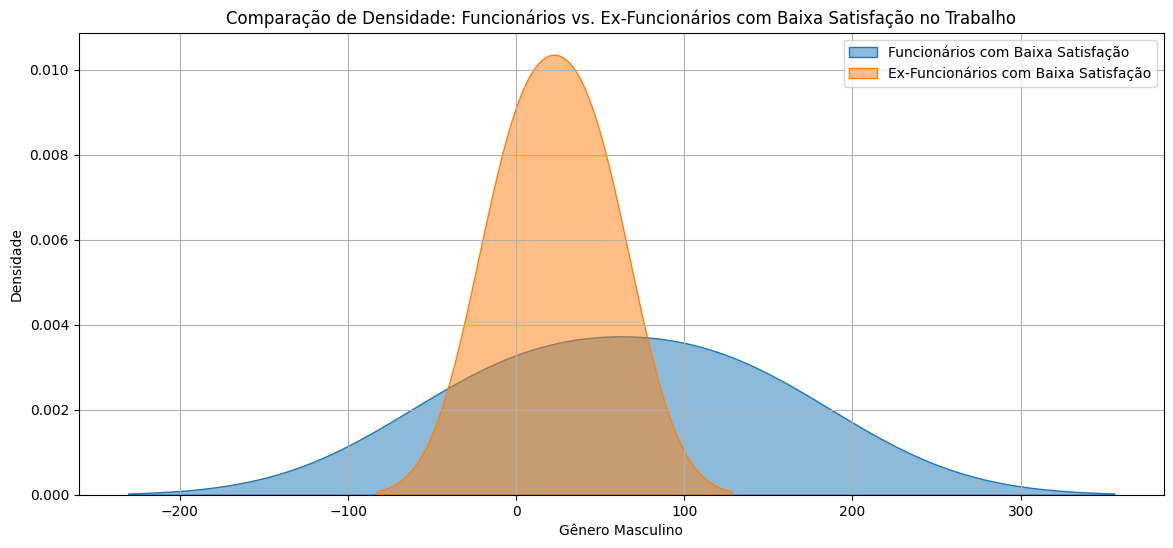

In [ ]:
# Filtro dos funcionários e ex funcionários por gênero, e satisfação no trabalho
baixa_satisfacao_funcionarios = rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Não') & (rh['satisfação trabalho'] == 'Baixo') & (rh['genero'] == 'Masculino')].value_counts()
baixa_satisfacao_demitidos = rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Sim') & (rh['satisfação trabalho'] == 'Baixo') & (rh['genero'] == 'Masculino')].value_counts()

# dataframe para plotagem
dados = pd.DataFrame({
    'Funcionarios': baixa_satisfacao_funcionarios ,
    'Demitidos': baixa_satisfacao_demitidos
}).fillna(0)

# Plotando o gráfico de densidade
plt.figure(figsize=(14,6))
sns.kdeplot(data=dados['Funcionarios'], label='Funcionários com Baixa Satisfação', fill=True, alpha=0.5)
sns.kdeplot(data=dados['Demitidos'], label='Ex-Funcionários com Baixa Satisfação', fill=True, alpha=0.5)

# Adicionando título e legendas
plt.title('Comparação de Densidade: Funcionários vs. Ex-Funcionários com Baixa Satisfação no Trabalho')
plt.xlabel('Gênero Masculino')
plt.ylabel('Densidade')
plt.legend()
plt.grid()
plt.show()


A altura da curva em qualquer ponto do gráfico indica a densidade de dados naquele intervalo. Quanto mais alta a curva, maior a densidade dos dados. Ou seja, há uma distribuição maior entre os ex-funcionários com baixa satisfação do que entre os funcionários.

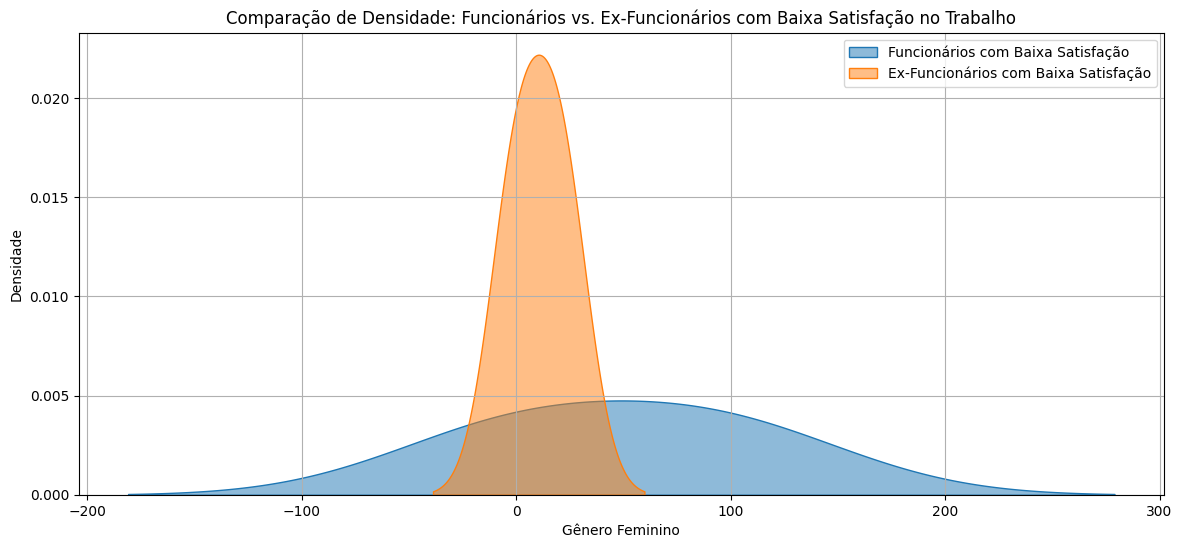

In [ ]:
# Filtro dos funcionários e ex funcionários por gênero, e satisfação no trabalho
baixa_satisfacao_funcionarios = rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Não') & (rh['satisfação trabalho'] == 'Baixo') & (rh['genero'] == 'Feminino')].value_counts()
baixa_satisfacao_demitidos = rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Sim') & (rh['satisfação trabalho'] == 'Baixo') & (rh['genero'] == 'Feminino')].value_counts()

# dataframe para plotagem
dados = pd.DataFrame({
    'Funcionarios': baixa_satisfacao_funcionarios ,
    'Demitidos': baixa_satisfacao_demitidos
}).fillna(0)

# Plotando o gráfico de densidade
plt.figure(figsize=(14,6))
sns.kdeplot(data=dados['Funcionarios'], label='Funcionários com Baixa Satisfação', fill=True, alpha=0.5)
sns.kdeplot(data=dados['Demitidos'], label='Ex-Funcionários com Baixa Satisfação', fill=True, alpha=0.5)

# Adicionando título e legendas
plt.title('Comparação de Densidade: Funcionários vs. Ex-Funcionários com Baixa Satisfação no Trabalho')
plt.xlabel('Gênero Feminino')
plt.ylabel('Densidade')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Distribuição de funcionários por gênero que foram demitidos e estão com baixa satisfação no trabalho
rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Sim') & (rh['satisfação trabalho'] == 'Baixo')].value_counts()

satisfação trabalho  genero     demissao
Baixo                Masculino  Sim         45
                     Feminino   Sim         21
Name: count, dtype: int64

In [ ]:
# Distribuição de funcionários por gênero que não foram demitidos e estão com médio satisfação no trabalho
rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Não') & (rh['satisfação trabalho'] == 'Médio')].value_counts()

satisfação trabalho  genero     demissao
Médio                Masculino  Não         140
                     Feminino   Não          94
Name: count, dtype: int64

In [ ]:
# Distribuição de funcionários por gênero que foram demitidos e estão com médio satisfação no trabalho
rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Sim') & (rh['satisfação trabalho'] == 'Médio')].value_counts()

satisfação trabalho  genero     demissao
Médio                Feminino   Sim         24
                     Masculino  Sim         22
Name: count, dtype: int64

In [ ]:
# Distribuição de funcionários por gênero que não foram demitidos e estão com alto satisfação no trabalho
rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Não') & (rh['satisfação trabalho'] == 'Alto')].value_counts()

satisfação trabalho  genero     demissao
Alto                 Masculino  Não         214
                     Feminino   Não         155
Name: count, dtype: int64

In [ ]:
# Distribuição de funcionários por gênero que foram demitidos e estão com alto satisfação no trabalho
rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Sim') & (rh['satisfação trabalho'] == 'Alto')].value_counts()

satisfação trabalho  genero     demissao
Alto                 Masculino  Sim         47
                     Feminino   Sim         26
Name: count, dtype: int64

In [ ]:
# Distribuição de funcionários por gênero que não foram demitidos e estão com muito alto satisfação no trabalho
rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Não') & (rh['satisfação trabalho'] == 'Muito Alto')].value_counts()

satisfação trabalho  genero     demissao
Muito Alto           Masculino  Não         253
                     Feminino   Não         154
Name: count, dtype: int64

In [ ]:
# Distribuição de funcionários por gênero que foram demitidos e estão com muito alto satisfação no trabalho
rh[['satisfação trabalho', 'genero', 'demissao']].loc[(rh['demissao'] == 'Sim') & (rh['satisfação trabalho'] == 'Muito Alto')].value_counts()

satisfação trabalho  genero     demissao
Muito Alto           Masculino  Sim         36
                     Feminino   Sim         16
Name: count, dtype: int64

In [ ]:
# Distribuição de Funcionários Demitidos por Estado Civil
rh[['estado civil','demissao']].groupby('estado civil')['demissao'].value_counts()

estado civil  demissao
Casado        Não         589
              Sim          84
Divorciado    Não         294
              Sim          33
Solteiro      Não         350
              Sim         120
Name: count, dtype: int64

In [ ]:
# Distribuição de Funcionários Demitidos por Estado Civil e Gênero
rh[['estado civil','demissao','genero']].groupby(['estado civil','genero'])['demissao'].value_counts()

estado civil  genero     demissao
Casado        Feminino   Não         241
                         Sim          31
              Masculino  Não         348
                         Sim          53
Divorciado    Feminino   Não         108
                         Sim           9
              Masculino  Não         186
                         Sim          24
Solteiro      Feminino   Não         152
                         Sim          47
              Masculino  Não         198
                         Sim          73
Name: count, dtype: int64

In [ ]:
#Média de Idade por Escolaridade
round(rh.groupby('escolaridade')['idade'].mean(),1)

,idade
escolaridade,
Abaixo da faculdade,32.2
Bacharelado,36.5
Doutor,39.9
Faculdade,36.9
Mestre,39.3


In [ ]:
#Média de Idade por Escolaridade e Genero
round(rh[['escolaridade','genero','idade']].groupby(['escolaridade','genero']).mean(),1)

idade
escolaridade        genero          
Abaixo da faculdade Feminino    32.9
                    Masculino   31.7
Bacharelado         Feminino    36.9
                    Masculino   36.2
Doutor              Feminino    41.7
                    Masculino   38.4
Faculdade           Feminino    37.3
                    Masculino   36.5
Mestre              Feminino    39.1
                    Masculino   39.4

In [ ]:
# Contagem de satisfação nas relações no trabalho(baixo) distribuido por cargo
rh.loc[rh['satisfação relações trabalho']=='Baixo'].groupby('cargo')[['satisfação relações trabalho']].value_counts()

,,count
cargo,satisfação relações trabalho,
Diretor de manufatura,Baixo,21
Diretor de pesquisa,Baixo,14
Executivo de vendas,Baixo,72
Gerente,Baixo,14
Pesquisador cientista,Baixo,60
Recursos Humanos,Baixo,6
Reprentante de saúde,Baixo,26
Representante de vendas,Baixo,19
Técnico de Laboratório,Baixo,44


In [ ]:
# Contagem de satisfação nas relações no trabalho(médio) distribuido por cargo
rh.loc[rh['satisfação relações trabalho']=='Médio'].groupby('cargo')[['satisfação relações trabalho']].value_counts()

,,count
cargo,satisfação relações trabalho,
Diretor de manufatura,Médio,38
Diretor de pesquisa,Médio,17
Executivo de vendas,Médio,54
Gerente,Médio,24
Pesquisador cientista,Médio,60
Recursos Humanos,Médio,8
Reprentante de saúde,Médio,29
Representante de vendas,Médio,18
Técnico de Laboratório,Médio,55


In [ ]:
# Contagem de satisfação nas relações no trabalho(alto) distribuido por cargo
rh.loc[rh['satisfação relações trabalho']=='Alto'].groupby('cargo')[['satisfação relações trabalho']].value_counts()

,,count
cargo,satisfação relações trabalho,
Diretor de manufatura,Alto,46
Diretor de pesquisa,Alto,29
Executivo de vendas,Alto,99
Gerente,Alto,31
Pesquisador cientista,Alto,78
Recursos Humanos,Alto,20
Reprentante de saúde,Alto,35
Representante de vendas,Alto,23
Técnico de Laboratório,Alto,98


In [ ]:
# Contagem de satisfação nas relações no trabalho(muito alto) distribuido por cargo
rh.loc[rh['satisfação relações trabalho']=='Muito Alto'].groupby('cargo')[['satisfação relações trabalho']].value_counts()

,,count
cargo,satisfação relações trabalho,
Diretor de manufatura,Muito Alto,40
Diretor de pesquisa,Muito Alto,20
Executivo de vendas,Muito Alto,101
Gerente,Muito Alto,33
Pesquisador cientista,Muito Alto,94
Recursos Humanos,Muito Alto,18
Reprentante de saúde,Muito Alto,41
Representante de vendas,Muito Alto,23
Técnico de Laboratório,Muito Alto,62


In [ ]:
# Contagem de satisfação nas relações no trabalho(muito alto) distribuido por cargo
media_satisfacao_baixo_cargo = rh.loc[rh['satisfação relações trabalho']=='Baixo'].groupby('cargo')[['satisfação relações trabalho']].value_counts().mean()
media_satisfacao_medio_cargo = rh.loc[rh['satisfação relações trabalho']=='Médio'].groupby('cargo')[['satisfação relações trabalho']].value_counts().mean()
media_satisfacao_alto_cargo = rh.loc[rh['satisfação relações trabalho']=='Alto'].groupby('cargo')[['satisfação relações trabalho']].value_counts().mean()
media_satisfacao_malto_cargo = rh.loc[rh['satisfação relações trabalho']=='Muito Alto'].groupby('cargo')[['satisfação relações trabalho']].value_counts().mean()

print(f'A média de satisfação nas relações de trabalho por cargo - Baixo: {media_satisfacao_baixo_cargo:.2f}')
print(f'A média de satisfação nas relações de trabalho por cargo - Médio: {media_satisfacao_medio_cargo:.2f}')
print(f'A média de satisfação nas relações de trabalho por cargo - Alto: {media_satisfacao_alto_cargo:.2f}')
print(f'A média de satisfação nas relações de trabalho por cargo - Muito Alto: {media_satisfacao_malto_cargo:.2f}')

A média de satisfação nas relações de trabalho por cargo - Baixo: 30.67
A média de satisfação nas relações de trabalho por cargo - Médio: 33.67
A média de satisfação nas relações de trabalho por cargo - Alto: 51.00
A média de satisfação nas relações de trabalho por cargo - Muito Alto: 48.00


In [ ]:
# Total de Horas Extras por Departamento
rh.loc[(rh['departamento'] == 'Pesquisa e Desenvolvimento') & (rh['hora extra'] == 'Sim')].groupby('departamento')['hora extra'].value_counts()

,,count
departamento,hora extra,
Pesquisa e Desenvolvimento,Sim,271


In [ ]:
rh.loc[(rh['departamento'] == 'Pesquisa e Desenvolvimento') & (rh['hora extra'] == 'Não')].groupby('departamento')['hora extra'].value_counts()

,,count
departamento,hora extra,
Pesquisa e Desenvolvimento,Não,690


In [ ]:
rh.loc[(rh['departamento'] == 'Recursos Humanos') & (rh['hora extra'] == 'Sim')].groupby('departamento')['hora extra'].value_counts()

,,count
departamento,hora extra,
Recursos Humanos,Sim,17


In [ ]:
rh.loc[(rh['departamento'] == 'Recursos Humanos') & (rh['hora extra'] == 'Não')].groupby('departamento')['hora extra'].value_counts()

,,count
departamento,hora extra,
Recursos Humanos,Não,46


In [ ]:
rh.loc[(rh['departamento'] == 'Vendas') & (rh['hora extra'] == 'Sim')].groupby('departamento')['hora extra'].value_counts()

,,count
departamento,hora extra,
Vendas,Sim,128


In [ ]:
rh.loc[(rh['departamento'] == 'Vendas') & (rh['hora extra'] == 'Não')].groupby('departamento')['hora extra'].value_counts()

,,count
departamento,hora extra,
Vendas,Não,318


In [ ]:
# Média de Distância de Casa por Gênero
round(rh.groupby('genero')['distancia'].mean(),3)

,distancia
genero,
Feminino,9.211
Masculino,9.180


In [ ]:
# Média de Satisfação do Ambiente de Trabalho por Hierarquia
rh.groupby('nivel hierarquico')['satisfação ambiente trabalho'].value_counts().mean()

73.5

In [ ]:
# Média de Satisfação do Ambiente de Trabalho por Hierarquia
media_satisfacao_ambiente_hierarquia_ma = rh.loc[(rh['nivel hierarquico'] == 'Muito Alto')].groupby('nivel hierarquico')['satisfação ambiente trabalho'].value_counts().mean()
media_satisfacao_ambiente_hierarquia_a = rh.loc[(rh['nivel hierarquico'] == 'Alto')].groupby('nivel hierarquico')['satisfação ambiente trabalho'].value_counts().mean()
media_satisfacao_ambiente_hierarquia_m = rh.loc[(rh['nivel hierarquico'] == 'Médio')].groupby('nivel hierarquico')['satisfação ambiente trabalho'].value_counts().mean()
media_satisfacao_ambiente_hierarquia_b = rh.loc[(rh['nivel hierarquico'] == 'Baixo')].groupby('nivel hierarquico')['satisfação ambiente trabalho'].value_counts().mean()

print('Média de Satisfação do Ambiente de Trabalho por Hierarquia')
print(f'Muito Alto: {media_satisfacao_ambiente_hierarquia_ma}')
print(f'Alto: {media_satisfacao_ambiente_hierarquia_a}')
print(f'Médio: {media_satisfacao_ambiente_hierarquia_m}')
print(f'Baixo: {media_satisfacao_ambiente_hierarquia_b}')


Média de Satisfação do Ambiente de Trabalho por Hierarquia
Muito Alto: 17.25
Alto: 26.5
Médio: 54.5
Baixo: 133.5


In [ ]:
# Média de Aumento Salarial por Tempo de Promoção(Anos)
rh.groupby('ultima promoção')['aumento de salario'].mean()

,aumento de salario
ultima promoção,
0,15.428571
1,14.966387
2,15.176101
3,15.538462
4,14.836066
5,15.800000
6,15.312500
7,14.736842
8,14.388889


In [ ]:
# Total de Treinamentos por Cargo
treinamentos_por_cargo_total = rh.groupby('cargo')['treinamentos feitos'].sum()
treinamentos_por_cargo_funcionario = rh.loc[(rh['demissao']=='Não')].groupby('cargo')['treinamentos feitos'].sum()
treinamentos_por_cargo_demitido = rh.loc[(rh['demissao']=='Sim')].groupby('cargo')['treinamentos feitos'].sum()

print('Total de Treinamentos por Cargo\n')
print(f'Funcionários: {treinamentos_por_cargo_funcionario}')

Total de Treinamentos por Cargo

Funcionários: cargo
Diretor de manufatura      372
Diretor de pesquisa        220
Executivo de vendas        772
Gerente                    276
Pesquisador cientista      653
Recursos Humanos           108
Reprentante de saúde       340
Representante de vendas    153
Técnico de Laboratório     599
Name: treinamentos feitos, dtype: int64


In [ ]:
print(f'Ex-Funcionários: {treinamentos_por_cargo_demitido}')

Ex-Funcionários: cargo
Diretor de manufatura       26
Diretor de pesquisa          2
Executivo de vendas        151
Gerente                     11
Pesquisador cientista      125
Recursos Humanos            25
Reprentante de saúde        20
Representante de vendas     97
Técnico de Laboratório     165
Name: treinamentos feitos, dtype: int64


In [ ]:
print(f'Total: {treinamentos_por_cargo_total}')

Total: cargo
Diretor de manufatura      398
Diretor de pesquisa        222
Executivo de vendas        923
Gerente                    287
Pesquisador cientista      778
Recursos Humanos           133
Reprentante de saúde       360
Representante de vendas    250
Técnico de Laboratório     764
Name: treinamentos feitos, dtype: int64


In [ ]:
# Média de Salário por Experiência na Função
round(rh.groupby('anos função atual')['salario'].mean(),2)

,salario
anos função atual,
0,14259.37
1,14612.53
2,14298.85
3,14278.25
4,14032.61
5,17134.50
6,14013.62
7,14428.10
8,14358.24


In [ ]:
# Número de Funcionários que Viajam por Departamento
rh.loc[(rh['demissao']=='Não')].groupby('departamento')['viajar'].value_counts()

departamento                viajar              
Pesquisa e Desenvolvimento  Viaja raramente         594
                            Viaja frequentemente    145
                            Não Viaja                89
Recursos Humanos            Viaja raramente          38
                            Viaja frequentemente      7
                            Não Viaja                 6
Vendas                      Viaja raramente         255
                            Viaja frequentemente     56
                            Não Viaja                43
Name: count, dtype: int64

In [ ]:
# Número de ex-Funcionários que Viajam por Departamento
rh.loc[(rh['demissao']=='Sim')].groupby('departamento')['viajar'].value_counts()

departamento                viajar              
Pesquisa e Desenvolvimento  Viaja raramente         88
                            Viaja frequentemente    37
                            Não Viaja                8
Recursos Humanos            Viaja raramente          8
                            Viaja frequentemente     4
Vendas                      Viaja raramente         60
                            Viaja frequentemente    28
                            Não Viaja                4
Name: count, dtype: int64

In [ ]:
# Contagem de Satisfação no Trabalho por Distância
rh.groupby('distancia')['satisfação trabalho'].value_counts()

distancia  satisfação trabalho
1          Muito Alto             68
           Alto                   58
           Baixo                  49
           Médio                  33
2          Muito Alto             78
                                  ..
28         Médio                   3
29         Muito Alto              9
           Alto                    8
           Médio                   6
           Baixo                   4
Name: count, Length: 116, dtype: int64

In [ ]:
# Média de Renda por Estado Civil
round(rh.groupby('estado civil')['renda'].mean(),2)

,renda
estado civil,
Casado,6793.67
Divorciado,6786.29
Solteiro,5889.47


In [ ]:
#Total de Stock Options de Funcionários
total_stock_option_func = rh.loc[(rh['demissao']=='Não')].groupby('cargo')['stocks'].value_counts().sum()
print('Total de Stock Options por Funcionários')
print(f'{total_stock_option_func}')

Total de Stock Options por Funcionários
1233


In [ ]:
#Total de Stock Options por cargo
total_stock_option_diretor_manufatura = rh.loc[(rh['cargo']=='Diretor de manufatura')].groupby('cargo')['stocks'].value_counts().sum()
print(f'Total de Stock options para Diretor de Manufatura: {total_stock_option_diretor_manufatura}')

Total de Stock options para Diretor de Manufatura: 145


In [ ]:
#Total de Stock Options por cargo
total_stock_option_diretor_vendas= rh.loc[(rh['cargo']=='Executivo de vendas')].groupby('cargo')['stocks'].value_counts().sum()
print(f'Total de Stock options para Executivo de Vendas: {total_stock_option_diretor_vendas}')

Total de Stock options para Executivo de Vendas: 326


In [ ]:
#Total de Stock Options por cargo
total_stock_option_gerente = rh.loc[(rh['cargo']=='Gerente')].groupby('cargo')['stocks'].value_counts().sum()
print(f'Total de Stock options para Gerente: {total_stock_option_gerente}')

Total de Stock options para Gerente: 102


In [ ]:
#Total de Stock Options por cargo
total_stock_option_pesquisador_cientista = rh.loc[(rh['cargo']=='Pesquisador cientista')].groupby('cargo')['stocks'].value_counts().sum()
print(f'Total de Stock options para Pesquisador Cientista: {total_stock_option_pesquisador_cientista}')

Total de Stock options para Pesquisador Cientista: 292


In [ ]:
#Total de Stock Options por cargo
total_stock_option_rh = rh.loc[(rh['cargo']=='Recursos Humanos')].groupby('cargo')['stocks'].value_counts().sum()
print(f'Total de Stock options para Recursos Humanos: {total_stock_option_rh}')

Total de Stock options para Recursos Humanos: 52


In [ ]:
#Total de Stock Options por cargo
total_stock_option_representante_saude = rh.loc[(rh['cargo']=='Reprentante de saúde')].groupby('cargo')['stocks'].value_counts().sum()
print(f'Total de Stock options para Representante de Saúde: {total_stock_option_representante_saude}')

Total de Stock options para Representante de Saúde: 131


In [ ]:
#Total de Stock Options por cargo
total_stock_option_representante_vendas = rh.loc[(rh['cargo']=='Representante de vendas')].groupby('cargo')['stocks'].value_counts().sum()
print(f'Total de Stock options para Representante de Vendas: {total_stock_option_representante_vendas}')

Total de Stock options para Representante de Vendas: 83


In [ ]:
#Total de Stock Options por cargo
total_stock_option_tecnico_laboratorio = rh.loc[(rh['cargo']=='Técnico de Laboratório')].groupby('cargo')['stocks'].value_counts().sum()
print(f'Total de Stock options para Técnico de Laboratório: {total_stock_option_tecnico_laboratorio}')

Total de Stock options para Técnico de Laboratório: 259


In [ ]:
# Distribuição de Funcionários por Idade e Gênero
rh.groupby(['idade', 'genero']).size()

idade  genero   
18     Feminino     4
       Masculino    4
19     Feminino     4
       Masculino    5
20     Feminino     6
                   ..
58     Masculino    8
59     Feminino     6
       Masculino    4
60     Feminino     2
       Masculino    3
Length: 85, dtype: int64

In [ ]:
#Média de Salário por Experiência na Empresa(anos)
round(rh.groupby('tempo de casa')['salario'].mean(),2)

,salario
tempo de casa,
0,14328.36
1,15010.38
2,14643.25
3,13950.30
4,14107.69
5,14404.57
6,14607.30
7,13693.89
8,14248.76


In [ ]:
# Total de Funcionários por Hierarquia e Cargo
rh[['id','nivel hierarquico','cargo']].groupby(['nivel hierarquico', 'cargo']).count()

id
nivel hierarquico cargo                       
Alto              Diretor de manufatura     10
                  Diretor de pesquisa       26
                  Executivo de vendas       14
                  Gerente                   47
                  Reprentante de saúde       9
Baixo             Diretor de manufatura     90
                  Executivo de vendas      233
                  Pesquisador cientista     57
                  Recursos Humanos          13
                  Reprentante de saúde      78
                  Representante de vendas    7
                  Técnico de Laboratório    56
Muito Alto        Diretor de pesquisa       26
                  Gerente                   43
Muito Baixo       Pesquisador cientista    234
                  Recursos Humanos          33
                  Representante de vendas   76
                  Técnico de Laboratório   200
Médio             Diretor de manufatura     45
                  Diretor de pesquisa       28
                  Executivo de vendas       79
                  Gerente                   12
                  Pesquisador cientista      1
                  Recursos Humanos           6
                  Reprentante de saúde      44
                  Técnico de Laboratório     3

##**EXPLORANDO OS DADOS**

Funcionários:
 - Estado Civil
 - Departamento
 - Genero
 - Escolaridade
 - Salário
    - Satisfação:
      - Ambiente de Trabalho
      - Relações de Trabalho
      - No Trabalho
        - Qtd de Treinamentos
         - Total de anos Trabalhados
         - Anos desde a última promoção
         - Score de Performance
         - Qualidade de vida


In [ ]:
novo_dado = rh[['estado civil','genero','escolaridade']].loc[(rh['demissao']=='Sim') & (rh['satisfação trabalho']=='Baixo')].groupby(['estado civil','genero','escolaridade'])['genero'].value_counts()

In [ ]:
import plotly.express as px

In [96]:
grafico = px.histogram(novo_dado, x=rh['estado civil'], text_auto=True, title='Ex-Funcionários com Baixa Satisfação no Trabalho', color=rh['genero'], barmode='group',color_discrete_sequence=['#FF5733', '#33FF57'] )

grafico.update_layout(
    title=dict(
        text='Ex-Funcionários com Baixa Satisfação no Trabalho',
        x=0.5,  # Centraliza o título
        xanchor='center',  # Alinha o centro do título ao centro do gráfico
        font=dict(size=16)  # Tamanho da fonte do título
    ),
    template='simple_white',  # Usar um tema sem fundo
    showlegend=False,         # Ocultar a legenda
    coloraxis_showscale=False # Ocultar a barra de cores
)

# Definir os rótulos dos eixos
grafico.update_layout(
    xaxis_title='',  # Rótulo do eixo X
    yaxis_title='',       # Rótulo do eixo Y
)

grafico.update_yaxes(showticklabels=False)

grafico.show()

In [97]:
grafico.write_html('analise_baixa_satisfacao_ex_funcionarios.html')